# Análise Exploratória ENEM 2019 - Camila Teixeira

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Análise dos Microdados do ENEM 2019 no Estado do Rio de Janeiro

O objetivo deste exercício é usar a biblioteca **pandas** para realizar uma análise dos microdados do Ename Nacional de Ensino Médio (ENEM) realizado pelos estudantes do estado do Rio de Janeiro em 2019. Os exercícios estão distribuídos ao longo do notebook, que servirá de guia na condução das análises.

# 0. Importação da biblioteca pandas

Importação da biblioteca **pandas** com o apelido de **pd**.

In [3]:
!pip install jupyterthemes

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()

# 1. Abertura do arquivo .CSV

Carga dos dados do arquivo 'MICRODADOS_ENEM_2019_RJ.csv' em um **DataFrame** chamado **df_ENEM**.

In [5]:
df_ENEM = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Análise Exploratória ENEM 2019/MICRODADOS_ENEM_2019_RJ.csv', sep=';')

In [6]:
df_ENEM.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001015227,2019,3302056,Italva,33,RJ,32,F,1,3,...,A,A,A,B,B,A,B,A,A,A
1,190001025702,2019,3305109,São João de Meriti,33,RJ,32,M,1,3,...,A,A,A,B,A,A,B,A,A,A
2,190001027285,2019,3304557,Rio de Janeiro,33,RJ,26,M,1,3,...,B,A,A,B,A,A,B,A,B,B
3,190001034993,2019,3304557,Rio de Janeiro,33,RJ,19,F,1,3,...,A,A,A,A,A,A,B,A,A,B
4,190001065566,2019,3304557,Rio de Janeiro,33,RJ,22,F,1,3,...,A,A,A,B,B,A,C,A,A,A


# 2. Seleção de Dados

 2.1. Novo DataFrame de nome **df_SEL** a partir da seleção das colunas:
* NU_INSCRICAO
* NO_MUNICIPIO_RESIDENCIA
* TP_SEXO
* TP_ESCOLA
* TP_DEPENDENCIA_ADM_ESC
* NU_NOTA_MT
* TP_STATUS_REDACAO
* NU_NOTA_REDACAO
* Q006



In [7]:
df_SEL = df_ENEM.filter(items=['NU_INSCRICAO','NO_MUNICIPIO_RESIDENCIA','TP_SEXO','TP_ESCOLA','TP_DEPENDENCIA_ADM_ESC','NU_NOTA_MT','TP_STATUS_REDACAO','NU_NOTA_REDACAO','Q006'])

In [8]:
df_SEL.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,TP_SEXO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q006
0,190001015227,Italva,F,1,NaN,419.8,1.0,640.0,C
1,190001025702,São João de Meriti,M,1,NaN,NaN,NaN,NaN,C
2,190001027285,Rio de Janeiro,M,1,NaN,NaN,NaN,NaN,E
3,190001034993,Rio de Janeiro,F,2,NaN,431.8,1.0,560.0,B
4,190001065566,Rio de Janeiro,F,1,NaN,NaN,NaN,NaN,B


2.2. Renomeação as colunas utilizando o dicionário **dict_colunas** a seguir:

In [9]:
dict_colunas = {'NU_INSCRICAO':'INSCRICAO', 
                'NO_MUNICIPIO_RESIDENCIA':'MUNICIPIO', 
                'TP_SEXO':'SEXO', 
                'TP_ESCOLA':'ESCOLA_TIPO', 
                'TP_DEPENDENCIA_ADM_ESC':'ESCOLA_ADM',
                'NU_NOTA_MT': 'NOTA_MATEMATICA',
                'TP_STATUS_REDACAO':'STATUS_REDACAO',
                'NU_NOTA_REDACAO':'NOTA_REDACAO',
                'Q006':'RENDA_FAMILIAR'
               }

In [10]:
df_SEL.rename(columns=dict_colunas)

,INSCRICAO,MUNICIPIO,SEXO,ESCOLA_TIPO,ESCOLA_ADM,NOTA_MATEMATICA,STATUS_REDACAO,NOTA_REDACAO,RENDA_FAMILIAR
0,190001015227,Italva,F,1,NaN,419.8,1.0,640.0,C
1,190001025702,São João de Meriti,M,1,NaN,NaN,NaN,NaN,C
2,190001027285,Rio de Janeiro,M,1,NaN,NaN,NaN,NaN,E
3,190001034993,Rio de Janeiro,F,2,NaN,431.8,1.0,560.0,B
4,190001065566,Rio de Janeiro,F,1,NaN,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...
338705,190006118895,Rio de Janeiro,F,2,2.0,508.5,1.0,620.0,D
338706,190006118896,São João de Meriti,F,1,NaN,410.9,1.0,580.0,D
338707,190006118897,Rio de Janeiro,F,1,NaN,583.7,1.0,740.0,G
338708,190006118898,Barra do Piraí,F,1,NaN,NaN,NaN,NaN,A


In [11]:
df_SEL.rename(columns=dict_colunas, inplace=True)

In [12]:
df_SEL.head()

,INSCRICAO,MUNICIPIO,SEXO,ESCOLA_TIPO,ESCOLA_ADM,NOTA_MATEMATICA,STATUS_REDACAO,NOTA_REDACAO,RENDA_FAMILIAR
0,190001015227,Italva,F,1,NaN,419.8,1.0,640.0,C
1,190001025702,São João de Meriti,M,1,NaN,NaN,NaN,NaN,C
2,190001027285,Rio de Janeiro,M,1,NaN,NaN,NaN,NaN,E
3,190001034993,Rio de Janeiro,F,2,NaN,431.8,1.0,560.0,B
4,190001065566,Rio de Janeiro,F,1,NaN,NaN,NaN,NaN,B


2.3. Verifição do número de valores não preenchidos (faltantes) em cada coluna.

In [13]:
df_SEL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338710 entries, 0 to 338709
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   INSCRICAO        338710 non-null  int64  
 1   MUNICIPIO        338710 non-null  object 
 2   SEXO             338710 non-null  object 
 3   ESCOLA_TIPO      338710 non-null  int64  
 4   ESCOLA_ADM       72967 non-null   float64
 5   NOTA_MATEMATICA  244924 non-null  float64
 6   STATUS_REDACAO   259279 non-null  float64
 7   NOTA_REDACAO     259279 non-null  float64
 8   RENDA_FAMILIAR   338710 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 23.3+ MB


In [14]:
df_SEL.isna()

,INSCRICAO,MUNICIPIO,SEXO,ESCOLA_TIPO,ESCOLA_ADM,NOTA_MATEMATICA,STATUS_REDACAO,NOTA_REDACAO,RENDA_FAMILIAR
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,True,True,True,False
2,False,False,False,False,True,True,True,True,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
338705,False,False,False,False,False,False,False,False,False
338706,False,False,False,False,True,False,False,False,False
338707,False,False,False,False,True,False,False,False,False
338708,False,False,False,False,True,True,True,True,False


In [15]:
df_SEL.isna().mean()

INSCRICAO          0.000000
MUNICIPIO          0.000000
SEXO               0.000000
ESCOLA_TIPO        0.000000
ESCOLA_ADM         0.784574
NOTA_MATEMATICA    0.276892
STATUS_REDACAO     0.234510
NOTA_REDACAO       0.234510
RENDA_FAMILIAR     0.000000
dtype: float64

2.4. Substituição dos códigos utilizados através do dicionário de dados.

In [16]:
dict_ESCOLA_TIPO = {1:'Não respondeu',
                  2:'Pública',
                  3:'Privada',
                  4:'Exterior'}

In [17]:
df_SEL['ESCOLA_TIPO_']=[dict_ESCOLA_TIPO.get(indice) for indice in df_SEL['ESCOLA_TIPO']]

In [18]:
dict_ESCOLA_ADM = {1:'Federal',
                   2:'Estadual',
                   3:'Municipal',
                   4:'Privada'}

In [19]:
df_SEL['ESCOLA_ADM_'] = [dict_ESCOLA_ADM.get(indice) for indice in df_SEL['ESCOLA_ADM']]

In [20]:
dict_STATUS_REDACAO = {1:'Sem problemas',
                       2:'Anulada',
                       3:'Cópia Texto Motivador',
                       4:'Em Branco',
                       6:'Fuga ao tema',
                       7:'Não atendimento ao tipo textual',
                       8:'Texto insuficiente',
                       9:'Parte desconectada'}

In [21]:
df_SEL['STATUS_REDACAO_']=[dict_STATUS_REDACAO.get(indice)for indice in df_SEL['STATUS_REDACAO']]

In [22]:
dict_RENDA_FAMILIAR = {'A':'Nenhuma renda.',
             'B':'Até R$ 998,00.',
             'C':'De R$ 998,01 até R$ 1.497,00.',
             'D':'De R$ 1.497,01 até R$ 1.996,00.',
             'E':'De R$ 1.996,01 até R$ 2.495,00.',
             'F':'De R$ 2.495,01 até R$ 2.994,00.',
             'G':'De R$ 2.994,01 até R$ 3.992,00.',
             'H':'De R$ 3.992,01 até R$ 4.990,00.',
             'I':'De R$ 4.990,01 até R$ 5.988,00.',
             'J':'De R$ 5.988,01 até R$ 6.986,00.',
             'K':'De R$ 6.986,01 até R$ 7.984,00.',
             'L':'De R$ 7.984,01 até R$ 8.982,00.',
             'M':'De R$ 8.982,01 até R$ 9.980,00.',
             'N':'De R$ 9.980,01 até R$ 11.976,00.',
             'O':'De R$ 11.976,01 até R$ 14.970,00.',
             'P':'De R$ 14.970,01 até R$ 19.960,00.',
             'Q':'Mais de R$ 19.960,00.'}

In [23]:
df_SEL['RENDA_FAMILIAR_']=[dict_RENDA_FAMILIAR.get(indice)for indice in df_SEL['RENDA_FAMILIAR']]

# 3.Análise Exploratória

3.1. Análise da distribuição de estudantes que realizaram o ENEM de acordo com **SEXO**.

In [24]:
df_SEL.SEXO.value_counts()

F    202488
M    136222
Name: SEXO, dtype: int64

3.1.1. Gráfico da distribuição de estudantes que realizaram o ENEM de acordo com SEXO.



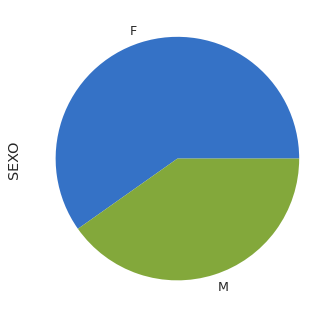

In [25]:
df_SEL.SEXO.value_counts().plot(kind='pie');

3.2. Análise da distribuição de estudantes que realizaram o ENEM de acordo com **ESCOLA_TIPO**.

In [26]:
df_SEL.ESCOLA_TIPO_.value_counts(normalize=True)

Não respondeu    0.701686
Pública          0.219937
Privada          0.078377
Name: ESCOLA_TIPO_, dtype: float64

3.2.1. Gráfico da distribuição de estudantes que realizaram o ENEM de acordo com **ESCOLA_TIPO**.

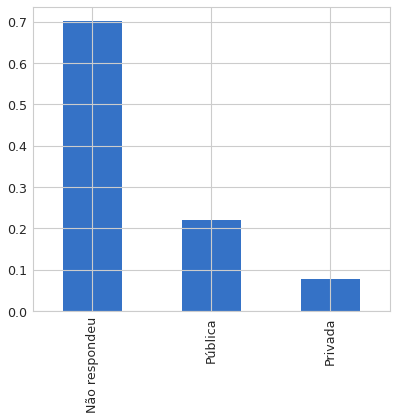

In [27]:
df_SEL.ESCOLA_TIPO_.value_counts(normalize=True).plot(kind='bar');

3.3. Análise da distribuição da quantidade de estudantes que realizaram o ENEM de acordo com **ESCOLA_TIPO** e **RENDA_FAMILIAR**.

In [28]:
df_SEL.groupby(by=['ESCOLA_TIPO_','RENDA_FAMILIAR']).count()

INSCRICAO  MUNICIPIO   SEXO  ESCOLA_TIPO  \
ESCOLA_TIPO_  RENDA_FAMILIAR                                             
Não respondeu A                    7773       7773   7773         7773   
              B                   38981      38981  38981        38981   
              C                   63660      63660  63660        63660   
              D                   27587      27587  27587        27587   
              E                   24295      24295  24295        24295   
              F                   12257      12257  12257        12257   
              G                   15117      15117  15117        15117   
              H                   10776      10776  10776        10776   
              I                    7940       7940   7940         7940   
              J                    5042       5042   5042         5042   
              K                    3665       3665   3665         3665   
              L                    2934       2934   2934         2934   
              M                    2882       2882   2882         2882   
              N                    4118       4118   4118         4118   
              O                    3481       3481   3481         3481   
              P                    3133       3133   3133         3133   
              Q                    4027       4027   4027         4027   
Privada       A                     214        214    214          214   
              B                     825        825    825          825   
              C                    2313       2313   2313         2313   
              D                    2020       2020   2020         2020   
              E                    2186       2186   2186         2186   
              F                    1771       1771   1771         1771   
              G                    2367       2367   2367         2367   
              H                    2402       2402   2402         2402   
              I                    1946       1946   1946         1946   
              J                    1428       1428   1428         1428   
              K                    1102       1102   1102         1102   
              L                     945        945    945          945   
              M                     956        956    956          956   
              N                    1429       1429   1429         1429   
              O                    1259       1259   1259         1259   
              P                    1321       1321   1321         1321   
              Q                    2063       2063   2063         2063   
Pública       A                    2851       2851   2851         2851   
              B                   17434      17434  17434        17434   
              C                   23544      23544  23544        23544   
              D                    8245       8245   8245         8245   
              E                    7994       7994   7994         7994   
              F                    3263       3263   3263         3263   
              G                    4236       4236   4236         4236   
              H                    2103       2103   2103         2103   
              I                    1620       1620   1620         1620   
              J                     792        792    792          792   
              K                     623        623    623          623   
              L                     397        397    397          397   
              M                     348        348    348          348   
              N                     413        413    413          413   
              O                     289        289    289          289   
              P                     208        208    208          208   
              Q                     135        135    135          135   

                              ESCOLA_ADM  NOTA_MATEMATICA  STATUS_REDACAO  \
ESCOLA_TIPO_  RENDA_FAMILIAR  

3.3.1. Análise do número de inscritos no ENEM de acordo com **ESCOLA_TIPO** e **RENDA_FAMILIAR**.

In [29]:
df_SEL.groupby(by=['ESCOLA_TIPO_','RENDA_FAMILIAR']).count()[['INSCRICAO']]

INSCRICAO
ESCOLA_TIPO_  RENDA_FAMILIAR           
Não respondeu A                    7773
              B                   38981
              C                   63660
              D                   27587
              E                   24295
              F                   12257
              G                   15117
              H                   10776
              I                    7940
              J                    5042
              K                    3665
              L                    2934
              M                    2882
              N                    4118
              O                    3481
              P                    3133
              Q                    4027
Privada       A                     214
              B                     825
              C                    2313
              D                    2020
              E                    2186
              F                    1771
              G                    2367
              H                    2402
              I                    1946
              J                    1428
              K                    1102
              L                     945
              M                     956
              N                    1429
              O                    1259
              P                    1321
              Q                    2063
Pública       A                    2851
              B                   17434
              C                   23544
              D                    8245
              E                    7994
              F                    3263
              G                    4236
              H                    2103
              I                    1620
              J                     792
              K                     623
              L                     397
              M                     348
              N                     413
              O                     289
              P                     208
              Q                     135

3.3.2. Gráfico do número de inscritos no ENEM oriundos de Escolas Públicas de acordo com **ESCOLA_TIPO** e **RENDA_FAMILIAR**.

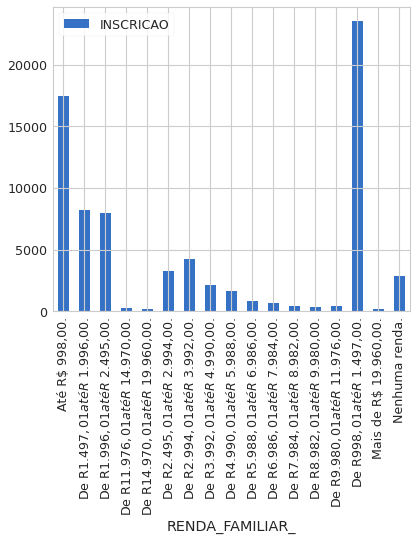

In [30]:
df_SEL.groupby(by=['ESCOLA_TIPO_','RENDA_FAMILIAR_']).count()[['INSCRICAO']].loc['Pública'].plot(kind='bar');

3.3.3. Gráfico do número de inscritos no ENEM oriundos de Escolas Privadas de acordo com **ESCOLA_TIPO** e **RENDA_FAMILIAR**.

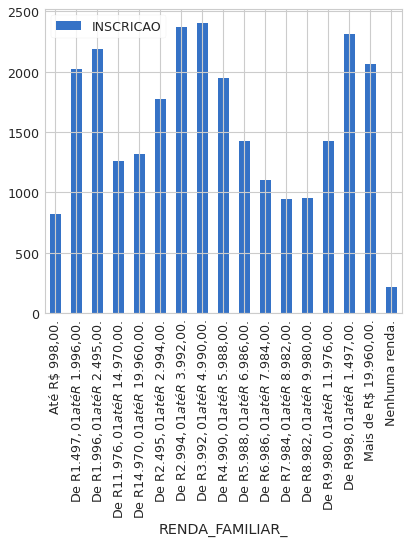

In [31]:
df_SEL.groupby(by=['ESCOLA_TIPO_','RENDA_FAMILIAR_']).count()[['INSCRICAO']].loc['Privada'].plot(kind='bar');

3.4. Comparação das notas de matemática e redação de acordo com **ESCOLA_ADM**

In [32]:
df_SEL[['ESCOLA_ADM','NOTA_MATEMATICA']]

,ESCOLA_ADM,NOTA_MATEMATICA
0,NaN,419.8
1,NaN,NaN
2,NaN,NaN
3,NaN,431.8
4,NaN,NaN
...,...,...
338705,2.0,508.5
338706,NaN,410.9
338707,NaN,583.7
338708,NaN,NaN


3.4.1. Gráfico da comparação das notas de matemática e redação de acordo com **ESCOLA_ADM**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


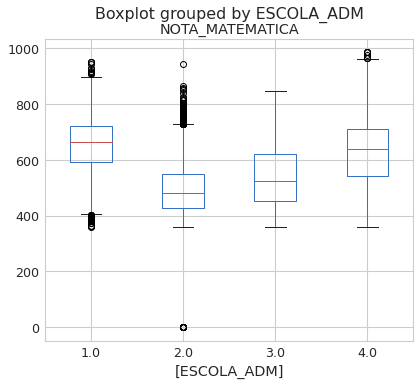

In [34]:
df_SEL[['ESCOLA_ADM','NOTA_MATEMATICA']].boxplot(by='ESCOLA_ADM');

3.4.2 Gráfico das notas de redação de acordo com **ESCOLA_ADM**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


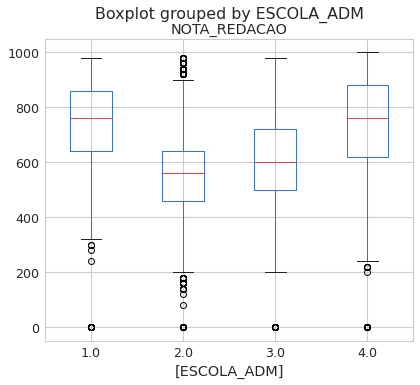

In [35]:
df_SEL[['ESCOLA_ADM','NOTA_REDACAO']].boxplot(by='ESCOLA_ADM');

3.5. Gráfico das notas de redação de acordo com **RENDA_FAMILIAR**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


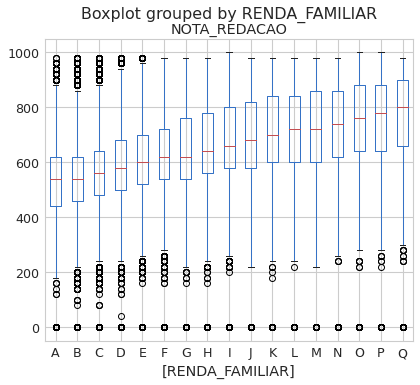

In [36]:
df_SEL[['RENDA_FAMILIAR','NOTA_REDACAO']].boxplot(by='RENDA_FAMILIAR');

3.5.1. Compare as notas de matemática de acordo com **RENDA_FAMILIAR**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


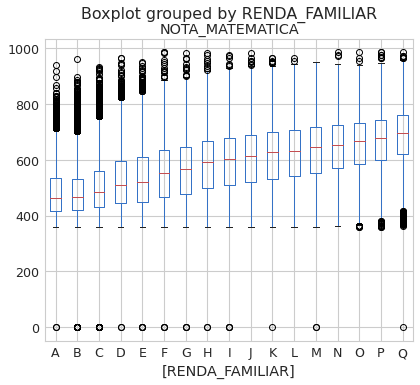

In [37]:
df_SEL[['RENDA_FAMILIAR','NOTA_MATEMATICA']].boxplot(by='RENDA_FAMILIAR');

3.6. Comparação das notas de redação de acordo com **ESCOLA_TIPO**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


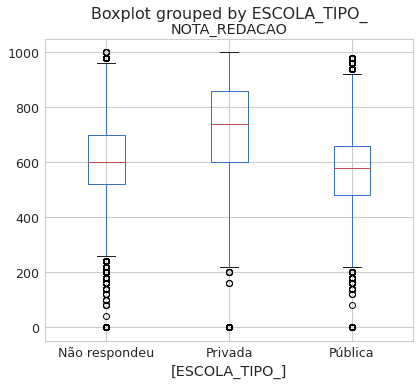

In [38]:
df_SEL[['ESCOLA_TIPO_','NOTA_REDACAO']].boxplot(by='ESCOLA_TIPO_');

3.6.1. Comparação das notas de matemática de acordo com **ESCOLA_TIPO**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


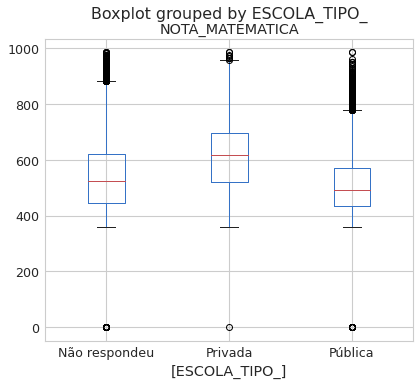

In [39]:
df_SEL[['ESCOLA_TIPO_','NOTA_MATEMATICA']].boxplot(by='ESCOLA_TIPO_');

3.7. Análises das notas de matemática de acordo com **MUNICIPIO**

In [40]:
df_SEL.groupby(by=['MUNICIPIO']).mean()['NOTA_MATEMATICA']

MUNICIPIO
Angra dos Reis        520.845753
Aperibé               542.992547
Araruama              532.785762
Areal                 515.313208
Armação dos Búzios    530.700000
                         ...    
Três Rios             522.841703
Valença               546.180657
Varre-Sai             534.113934
Vassouras             525.596239
Volta Redonda         569.327552
Name: NOTA_MATEMATICA, Length: 92, dtype: float64

3.7.1. Gráfico da comparação as notas de matemática de acordo com **MUNICIPIO**

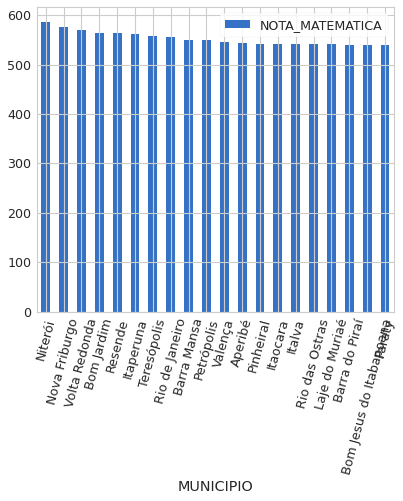

In [41]:
df_SEL.groupby(by=['MUNICIPIO']).mean()[['NOTA_MATEMATICA']].sort_values(by='NOTA_MATEMATICA', ascending=False)[:20].plot(kind='bar',rot=75);

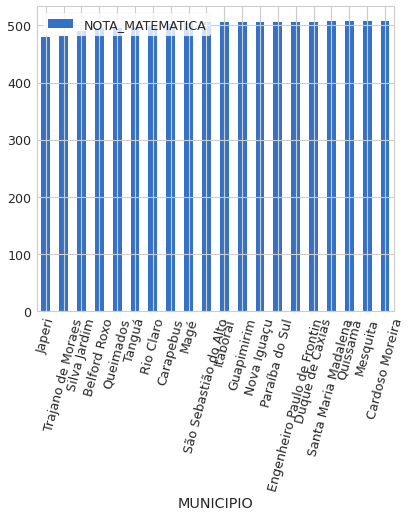

In [42]:
df_SEL.groupby(by=['MUNICIPIO']).mean()[['NOTA_MATEMATICA']].sort_values(by='NOTA_MATEMATICA', ascending=True)[:20].plot(kind='bar',rot=75);

3.8. Comparação do status da redação (**REDAÇÃO DESQUALIFICADA**) de acordo com **RENDA_FAMILIAR**

In [43]:
df_SEL['REDACAO_DESQUALIFICADA']=(df_SEL['STATUS_REDACAO']!=1)

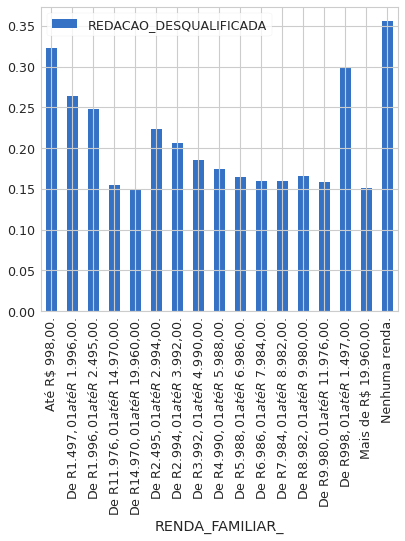

In [44]:
df_SEL.groupby(by='RENDA_FAMILIAR_').mean()[['REDACAO_DESQUALIFICADA']].plot(kind='bar');